# Data Wrangling

### Student Name: Roshnaey Khattak

In [1]:
#import any required libraries
import pandas as pd
from datetime import date, datetime 
from scipy import stats

#### Step 1 – Programmatically download the required data for December 2019.

In [2]:
url = 'https://nyc-tlc.s3.amazonaws.com/trip+data/green_tripdata_2019-12.csv' #provide the link to the data for December 2019

try:
    data = pd.read_csv(url) #load the data into a dataframe
    
except IOError:
    print ('Unable to read the input file.')
    exit()

/Users/roshnaey/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Step 2 – Report the number of rows and columns in the data.

In [3]:
#Print the number of rows and columns in data.
taxi_data = pd.DataFrame (data)

taxi_data_variables = taxi_data.columns
print (taxi_data_variables)

rows = len(taxi_data.axes[0])
cols = len(taxi_data.axes[1])

print("Number of rows: " + str(rows))
print("Number of columns: " + str(cols))

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')
Number of rows: 450627
Number of columns: 20


#### Step 3 – Gather summary/descriptive statistics. State your initial observations (no more than 1 paragraph) and identify any inconsistencies. 
HINT: you can use the **describe** function

In [4]:
#display the summary statistics using the describe() function from the pandas dataframe
#state your observations or any inconsistencies that were detected in step 3
statistics = taxi_data.describe()
print(statistics)

            VendorID     RatecodeID   PULocationID   DOLocationID  \
count  359902.000000  359902.000000  450627.000000  450627.000000   
mean        1.833449       1.102836     107.480599     128.446118   
std         0.372575       0.623131      70.625075      76.086904   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000      52.000000      64.000000   
50%         2.000000       1.000000      82.000000     129.000000   
75%         2.000000       1.000000     166.000000     192.000000   
max         2.000000       6.000000     265.000000     265.000000   

       passenger_count  trip_distance    fare_amount          extra  \
count    359902.000000  450627.000000  450627.000000  450627.000000   
mean          1.311582       3.445025      15.586714       0.888232   
std           0.968107     117.057614      12.915723       1.166764   
min           0.000000   -9436.330000    -200.000000      -4.500000   
25%           1.000000 

In [5]:
# I'm very confused as to why the data for some variables (trip distance, fare amount, extra, mta tax, tip amount, 
# improvement surcharge, total amount, and congestion surcharge) are negative numbers.

In [6]:
# I also noted that all of the values for ehail_fee were NaN, and that there were zero observations with a value
# for that variable. For that reason, I will remove the variable all together. 
del taxi_data['ehail_fee']

# Check to see if the variable is gone by running another summary statistic.
statistics_without_ehail = taxi_data.describe()
print(statistics_without_ehail)

            VendorID     RatecodeID   PULocationID   DOLocationID  \
count  359902.000000  359902.000000  450627.000000  450627.000000   
mean        1.833449       1.102836     107.480599     128.446118   
std         0.372575       0.623131      70.625075      76.086904   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000      52.000000      64.000000   
50%         2.000000       1.000000      82.000000     129.000000   
75%         2.000000       1.000000     166.000000     192.000000   
max         2.000000       6.000000     265.000000     265.000000   

       passenger_count  trip_distance    fare_amount          extra  \
count    359902.000000  450627.000000  450627.000000  450627.000000   
mean          1.311582       3.445025      15.586714       0.888232   
std           0.968107     117.057614      12.915723       1.166764   
min           0.000000   -9436.330000    -200.000000      -4.500000   
25%           1.000000 

#### Step 4 – Examine the data for missing observations and duplicate records. Suggest what methods are appropriate to handle them.

In [7]:
#Perform the action(s) in step 4 to handle any missing data and duplicate records that were found.

In [8]:
# Check for duplicate rows
taxi_data.duplicated(subset = None, keep = 'first')

0         False
1         False
2         False
3         False
4         False
          ...  
450622    False
450623    False
450624    False
450625    False
450626    False
Length: 450627, dtype: bool

In [9]:
# Check for missing values and fill with previous ones 
taxi_data.isnull()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450622,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,True,True
450623,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,True,True
450624,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,True,True
450625,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,True,True


In [10]:
# Fill missing values with previous ones
taxi_data.fillna(method = 'pad')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.00,0.50,0.5,0.00,0.0,0.3,4.30,2.0,1.0,0.00
1,2.0,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.50,0.50,0.5,2.04,0.0,0.3,8.84,1.0,1.0,0.00
2,2.0,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.50,0.50,0.5,0.00,0.0,0.3,5.80,2.0,1.0,0.00
3,2.0,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.00,0.50,0.5,0.00,0.0,0.3,15.30,2.0,1.0,0.00
4,2.0,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.50,0.50,0.5,0.00,0.0,0.3,5.80,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450622,2.0,2019-12-31 23:26:00,2019-12-31 23:54:00,N,1.0,35,130,1.0,10.02,48.85,2.75,0.0,0.00,0.0,0.3,51.90,2.0,1.0,2.75
450623,2.0,2019-12-31 23:02:00,2019-12-31 23:16:00,N,1.0,76,61,1.0,2.27,23.31,2.75,0.0,0.00,0.0,0.3,26.36,2.0,1.0,2.75
450624,2.0,2019-12-31 23:24:00,2019-12-31 23:40:00,N,1.0,185,247,1.0,9.35,27.27,2.75,0.0,0.00,0.0,0.3,30.32,2.0,1.0,2.75
450625,2.0,2019-12-31 23:16:00,2019-12-31 23:37:00,N,1.0,51,126,1.0,-7.16,35.95,2.75,0.5,0.00,0.0,0.3,39.50,2.0,1.0,2.75


#### Step 5 – Plot a histogram showing the distribution of the trip distance. Discuss your observations (no more than 1 paragraph).

Text(0, 0.5, 'Frequency')

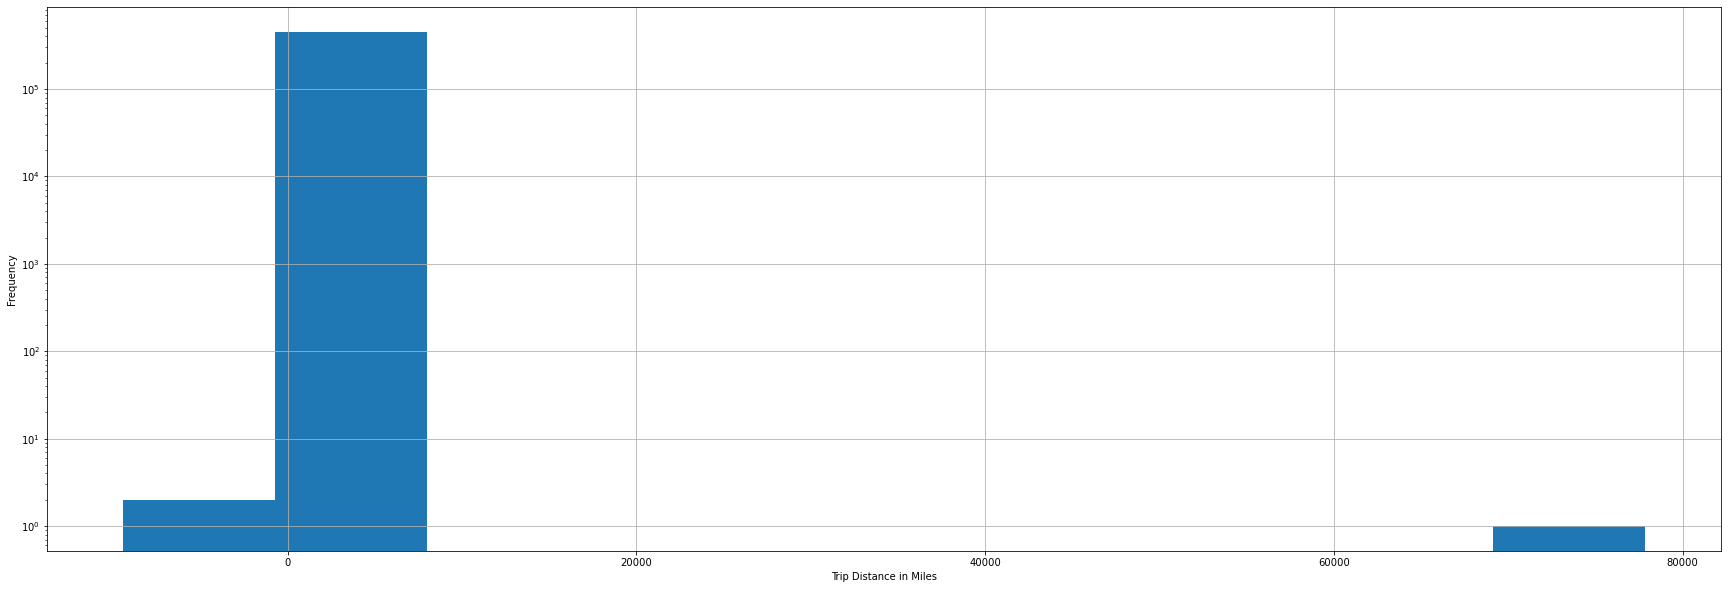

In [11]:
# Look at the summary statistics of the trip distance variable.
taxi_data['trip_distance'].describe()

histogram = taxi_data['trip_distance'].hist(bins = 10, figsize = (30, 10))
histogram.set_yscale('log')
histogram.set_xlabel("Trip Distance in Miles")
histogram.set_ylabel("Frequency")

# There are clearly some outliers, as the standard deviation is 117 and the max value is 77843.776 which makes
# very little sense. Because of this, I will be removing the outliers in the next step.

#### Step 6 – Did you detect any outliers in step 5? If so, perform a suitable method to handle them?

In [18]:
# There were many outliers in our dataset with regards to the trip distance variable.
taxi_data['zscore_trip_distance'] = stats.zscore(taxi_data['trip_distance'])


count    4.506270e+05
mean     6.704117e-16
std      1.000001e+00
min     -8.064222e+01
25%     -2.054567e-02
50%     -1.285714e-02
75%      4.741048e-03
max      6.649751e+02
Name: zscore_trip_distance, dtype: float64

In [22]:
#Now we will remove the outliers that are not within 3 standard deviations of the mean.
taxi_data = taxi_data.loc[taxi_data['zscore_trip_distance'].abs()<=3]

Text(0, 0.5, 'Frequency')

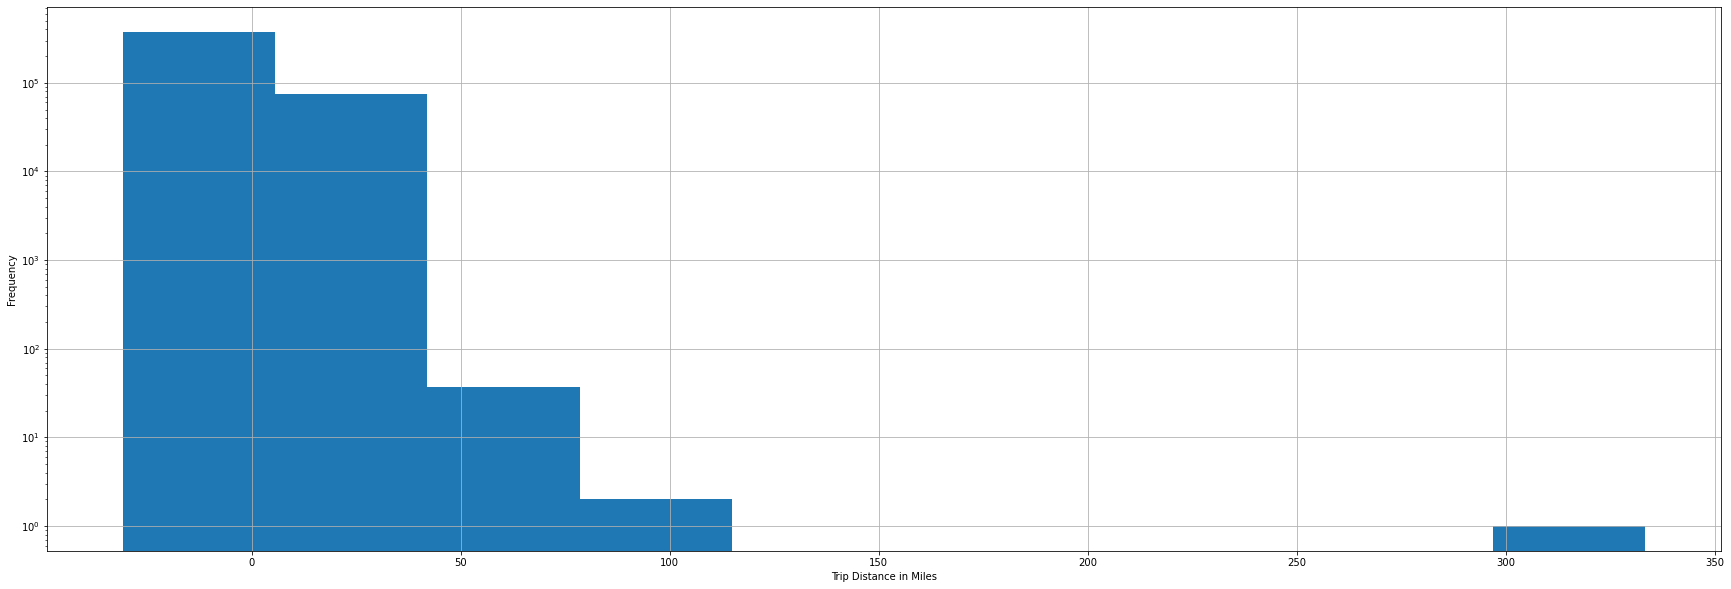

In [23]:
#Just to test this, I'm going to run the previous summary statements and histogram again. 
histogram2 = taxi_data['trip_distance'].hist(bins = 10, figsize = (30, 10))
histogram2.set_yscale('log')
histogram2.set_xlabel("Trip Distance in Miles")
histogram2.set_ylabel("Frequency")

In [ ]:
# We can now see the fine details of the trip distance data. 

#### Step 7 – Show the frequency of trips for each date. Do you see any interesting patterns or do you detect the need for additional data prep. rules.

In [31]:
# taxi_data['lpep_pickup_datetime'].value_counts()

# The above code does not work as it contains the data for each specific time and date, so it does not populate the
# frequency table correctly. To try and fix this I am going to see if I can remove the time portion of each 
# observation so that the date is all that is left. 

print (type(taxi_data['lpep_pickup_datetime']))
taxi_data['lpep_pickup_datetime'] = pd.to_datetime(taxi_data['lpep_pickup_datetime'], format = '%Y-%m-%d').dt.date
taxi_data['lpep_pickup_datetime'].value_counts().sort_index()

<class 'pandas.core.series.Series'>


<ipython-input-31-f8489b839d9c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['lpep_pickup_datetime'] = pd.to_datetime(taxi_data['lpep_pickup_datetime'], format = '%Y-%m-%d').dt.date


2008-12-31        6
2009-01-01       10
2010-09-23        1
2019-11-30        7
2019-12-01    11145
2019-12-02    13933
2019-12-03    15252
2019-12-04    16076
2019-12-05    17276
2019-12-06    17882
2019-12-07    16501
2019-12-08    13306
2019-12-09    15030
2019-12-10    15807
2019-12-11    15955
2019-12-12    17535
2019-12-13    18169
2019-12-14    16253
2019-12-15    13961
2019-12-16    15398
2019-12-17    15708
2019-12-18    16412
2019-12-19    17295
2019-12-20    17326
2019-12-21    14758
2019-12-22    11807
2019-12-23    13439
2019-12-24    13128
2019-12-25     7551
2019-12-26    11127
2019-12-27    12465
2019-12-28    12129
2019-12-29    11040
2019-12-30    12571
2019-12-31    14327
2020-01-01       25
2020-01-03        3
2020-01-24        2
2020-02-14        2
2020-03-08        1
2020-03-29        1
2020-04-01        1
2020-04-22        2
2035-09-02        1
Name: lpep_pickup_datetime, dtype: int64

In [ ]:
# From this we can see that we have some odd extraneous points, where the data is for dates not in December 2019.
# On a side note, I'm not sure how to fix the warning message I received above. It did not show up when I initially
# ran the code initially, but popped up when I was performing a final check after I completed the assignment. 

#### Step 8 
  - (a) Create a visualization that shows how people pay for their cab rides (e.g. credit card, cash, etc.). Can you say what is the most popular mode of payment?
  - (b) Filter the data to only include customers who paid via credit card.

In [37]:
# To show how people pay for their cab rides, I will begin by creating a distribution table of the payment methods. 
taxi_data['payment_type'].value_counts().sort_index()

1.0    191532
2.0    165805
3.0      1834
4.0       723
5.0         8
Name: payment_type, dtype: int64

In [79]:
# To filter out the data for credit card transactions.
credit_card_payments = (taxi_data['payment_type'] == '1.0')
credit_card_payments.describe()

count     450624
unique         1
top        False
freq      450624
Name: payment_type, dtype: object

#### Step 9 –  Create a compelling visualization, based on your intuition, about the data and any useful insights on what factors contribute to cab driver's gratuity. 
  For example: 
  - Is there any correlation between the pickup/drop-off location and the gratuity? 
  - Does the trip distance or duration influence gratuity?

<AxesSubplot:xlabel='payment_type', ylabel='tip_amount'>

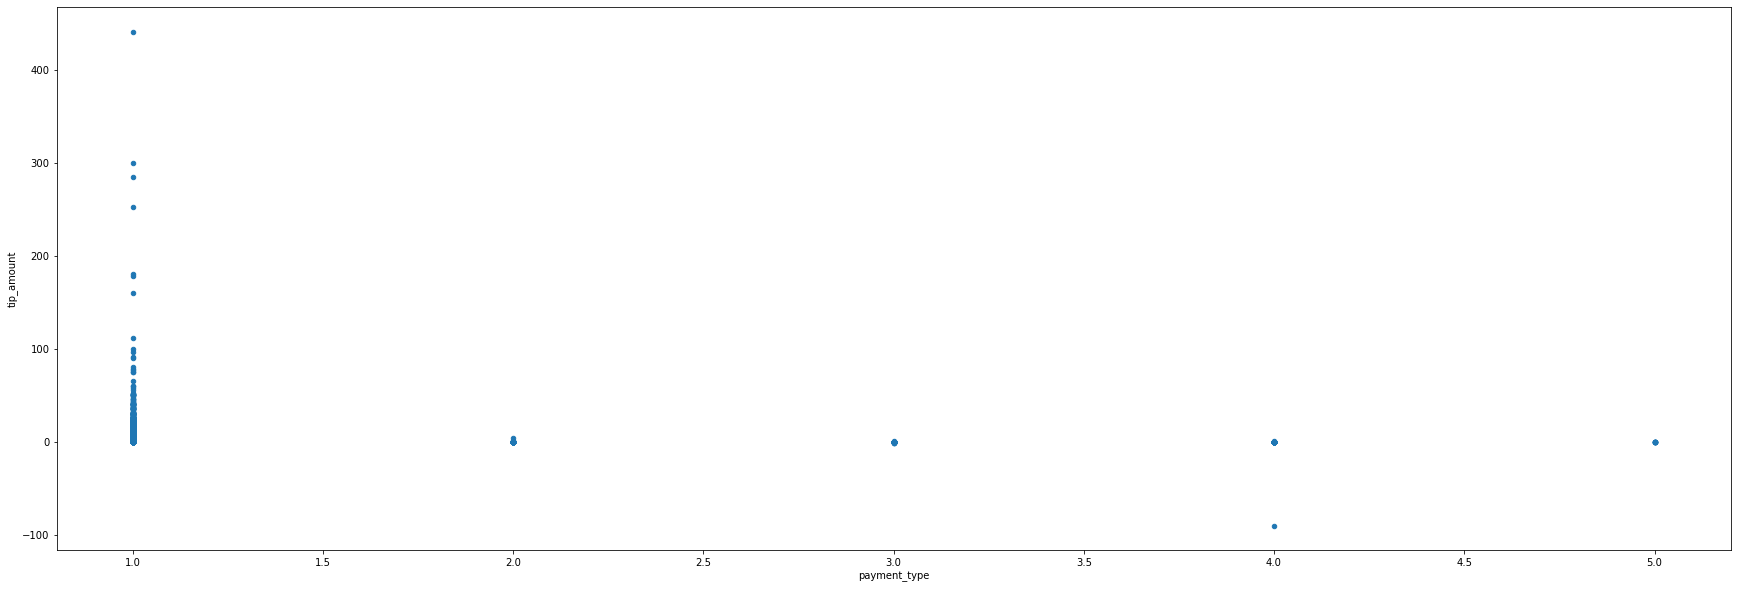

In [66]:
# I want to see if the payment time affects gratuity. In my opinion the best way to showcase this is through
# a scatter plot.
taxi_data.plot.scatter(x = 'payment_type', y = 'tip_amount',figsize = (30, 10))

In [ ]:
# Because of how skewed our data is with regards to payment type, since the majority of people paid with credit
# card, it is hard to see if there is evidence to suggest that payment type has an affect on the gratuity
# a driver will receive. 